In [40]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2
%pylab inline
import stmpy
import stmpy.driftcorr as dfc
import scipy as sp
from dset_utils import *
from numpy import *
import matplotlib.patches as patches
import random as rd
import PIL
from tqdm import tqdm
import os
!pip install tqdm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Populating the interactive namespace from numpy and matplotlib


In [42]:
cd /Users/aidanwiteck/Desktop/Harvard/part2/rcnn-from-aws/

/Users/aidanwiteck/Desktop/Harvard/part2/rcnn-from-aws


In [43]:
### import PIL
from tqdm import tqdm
import os
import pandas as pd

dpath_root = './obj_detection/YOLO/yolov3-master/'
datatrain = 'data/train.txt'
datatest ='data/test.txt'

!rm -rf ./obj_detection/YOLO/yolov3-master/images/train
!rm -rf ./obj_detection/YOLO/yolov3-master/images/test
!mkdir ./obj_detection/YOLO/yolov3-master/images/train
!mkdir ./obj_detection/YOLO/yolov3-master/images/test

z0 = generate_map(50, 320, 1)
a = numpy.asarray([ ['class', 'x_center', 'y_center', 'width', 'height'] ])
n = 5000
test_pct = .2

trainimagepaths = []
testimagepaths = []

for a in tqdm(range(n)):
    z, p, w = generate_image()
    p/=len(z0); w/=len(z0)
    p=around(p,4); w=around(w,4)
    im = PIL.Image.fromarray(z)
    if im.mode != 'RGB':
        im = im.convert('RGB')
    impath = None
    if a<(n*test_pct):
        #impath = os.path.join(os.path.abspath('.'),f'keras-frcnn/test_imgs/{a}.jpg')
        impath = f'images/test/{a}.jpg'
        labelpath = f'labels/test/{a}.txt'
        #testimagepaths.append(dpath_root+impath)
        testimagepaths.append(impath)
        
    else:
        #impath = os.path.join(os.path.abspath('.'),f'keras-frcnn/train_imgs/{a}.jpg')
        impath = f'images/train/{a}.jpg'
        labelpath = f'labels/train/{a}.txt'
        #trainimagepaths.append(dpath_root+impath)
        trainimagepaths.append(impath)
        
        
    im.save(os.path.join(dpath_root,impath))

    rows = []
    for b in range(len(p)):
        t= (p[b][0],p[b][1],w[b],w[b])
        temprow = list(t)
        rows.append(['0']+temprow)
    
    
        
    df = pd.DataFrame.from_records(rows)
    df.columns = ['class', 'x_center', 'y_center', 'width', 'height']
    df = df[['class', 'x_center', 'y_center', 'width', 'height']]
    df.to_csv(os.path.join(dpath_root,labelpath), index=False, sep=' ', header=None)

    
    
df2 = pd.DataFrame(trainimagepaths)
df2.to_csv(os.path.join(dpath_root,datatrain), index=False, sep=' ', header=None)
#df2.to_csv(datatrain, index=False, sep=' ', header=None)

df3 = pd.DataFrame(testimagepaths)
df3.to_csv(os.path.join(dpath_root,datatest), index=False, sep=' ', header=None)
#df3.to_csv(datatest, index=False, sep=' ', header=None)

100%|██████████| 5000/5000 [08:00<00:00, 10.41it/s]


In [16]:
df2

,0
0,./obj_detection/YOLOimages/train/2.jpg
1,./obj_detection/YOLOimages/train/3.jpg
2,./obj_detection/YOLOimages/train/4.jpg
3,./obj_detection/YOLOimages/train/5.jpg
4,./obj_detection/YOLOimages/train/6.jpg
5,./obj_detection/YOLOimages/train/7.jpg
6,./obj_detection/YOLOimages/train/8.jpg
7,./obj_detection/YOLOimages/train/9.jpg


In [44]:
cd /Users/aidanwiteck/Desktop/Harvard/part2/rcnn-from-aws/obj_detection/YOLO/yolov3-master

/Users/aidanwiteck/Desktop/Harvard/part2/rcnn-from-aws/obj_detection/YOLO/yolov3-master


In [49]:
!python3 train.py --data data/coco1cls.data --epochs 5

Namespace(accumulate=4, adam=False, arc='default', batch_size=16, bucket='', cache_images=False, cfg='cfg/yolov3-spp.cfg', data='data/coco1cls.data', device='', epochs=5, evolve=False, img_size=416, multi_scale=False, name='', nosave=False, notest=False, prebias=False, rect=False, resume=False, transfer=False, var=None, weights='weights/ultralytics68.pt')
Using CPU

Caching labels (1000 found, 0 missing, 0 empty, 0 duplicate, for 1000 images): 100%|█| 1000/1000 [00:00<00:00, 1571.32it/s]
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
Using 8 dataloader workers
Starting training for 5 epochs...

     Epoch   gpu_mem      GIoU       obj       cls     total   targets  img_size
       0/4        0G      3.37      1.81         0      5.18        84       416: 100%|█| 250/250 [1:45:34<00:00, 24.45s/it]
               Class    Images   Targets         P         R   mAP@0.5        F1: 100%|█| 32/32 [08:02<00:00, 11.92s/it]
                 all     1e+03  3.99e+03     

In [64]:
!python3 detect.py --weights weights/last.pt

Namespace(cfg='cfg/yolov3-spp.cfg', conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=416, iou_thres=0.5, names='data/coco.names', output='output', source='data/samples', view_img=False, weights='weights/last.pt')
Using CPU

image 1/7 data/samples/0.jpg: image 2/7 data/samples/1.jpg: 416x416 4 impuritys, Done. (0.753s)
image 3/7 data/samples/2.jpg: 416x416 8 impuritys, Done. (0.844s)
image 4/7 data/samples/3.jpg: 416x416 11 impuritys, Done. (0.775s)
image 5/7 data/samples/4.jpg: 416x416 11 impuritys, Done. (0.890s)
image 6/7 data/samples/5.jpg: 416x416 10 impuritys, Done. (0.895s)
image 7/7 data/samples/6.jpg: 416x416 1 impuritys, Done. (1.098s)
Results saved to /Users/aidanwiteck/Desktop/Harvard/part2/rcnn-from-aws/obj_detection/YOLO/yolov3-master/output
Done. (6.191s)


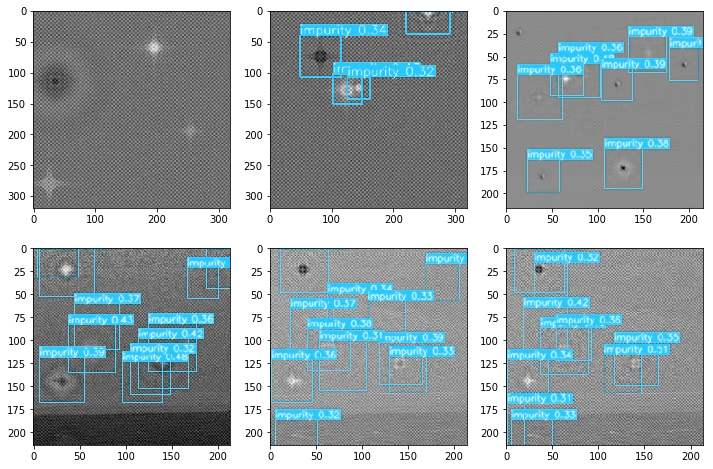

In [65]:
import cv2
imgs=[]
path = '/Users/aidanwiteck/Desktop/Harvard/part2/rcnn-from-aws/obj_detection/YOLO/yolov3-master/output/'
num_of_imgs = 6

for a in range(num_of_imgs):
    img = cv2.imread(path+f'{a}.jpg')
    imgs.append(img)
fig, ax = subplots(num_of_imgs//3,3,figsize=(12,num_of_imgs//3*4))
for b in range(num_of_imgs):
    ax[b//3,b%3].imshow(imgs[b])

In [59]:
path = '/Users/aidanwiteck/Desktop/Harvard/part2/rcnn-from-aws/obj_detection/YOLO/yolov3-master/output/1.jpg'
img=cv2.imread(path)
type(img)

NoneType

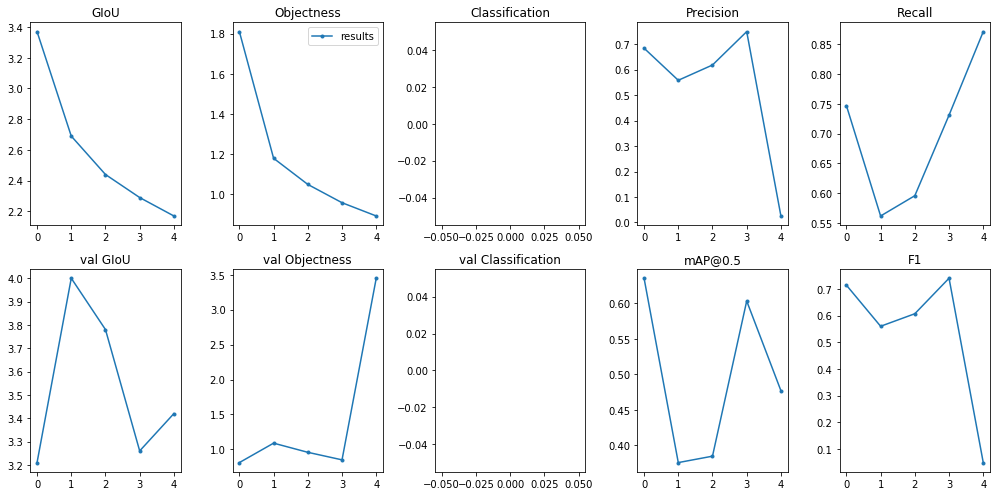

In [51]:
from utils import utils; utils.plot_results()

In [ ]:
!python3 train.py --data data/coco1cls.data --epochs 15 --resume